In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Enable inline plotting
%matplotlib inline

plt.rcParams["figure.figsize"]=15,10 # changing the size of the graphs.

Code: code for the battleground (not needed for analysis).
- Faction: faction of the player (Horde or Alliance).
- Class: class of the player (warrior, paladin, hunter, rogue, priest, death knight, shaman, mage, - warlock, monk, druid, demon hunter).
- KB: number of mortal kills given by the player.
- D: number of times that the player died.
- HK: number of killings where the player or his/her group contributed.
- DD: damage done by the player.
- HD: healing done by the player.
- Honor: honor awarded to the player.
- Win: 1 if the player won.
- Lose: 1 if the player lost.
- Rol: dps if the player is a damage dealer; heal if the player is focused in healing allies. Note that not all classes can be healers, just shaman, paladin, priest, monk and druid, but all classes can be damage dealers.
- BE: some weeks there is a bonus event, when the honor gained is increased. 1 if the battleground  happened during that week.

# Following maps
- TK: Temple of Kotmogu.
- WG: Warsong gulch.

    To - do list
 - Check the amount of honor based on the 'HK' = Honorable Kills and see if they have won or not based on the amount of honor gained.
 - Compare the stats from Temple of Kotmogu to Walsong Gulch to see the performance.
 - Comparing PRIEST heals vs SHAMAN heals & WARRIOR damage vs HUNTER damage 

In [20]:
df = pd.read_csv('wowbgs.csv')
dfwg = pd.read_csv('wowwg.csv')
dftk = pd.read_csv('wowtk.csv')

After getting importing the spreadsheets from the file, we will get getting the headings of the each spreadsheet.

In [11]:
df.head()

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN


Heading of wowbgs.csv

In [12]:
dfwg.head()

,Code,Faction,Class,KB,D,HK,DD,HD,FC,FR,Honor,Win,Lose,Rol,BE
0,WG1,Horde,Hunter,1,3,14,48155,6641,1.0,NaN,532,1.0,NaN,dps,NaN
1,WG1,Horde,Death Knight,1,3,12,27025,7106,NaN,NaN,377,1.0,NaN,dps,NaN
2,WG1,Alliance,Paladin,0,1,19,824,93879,NaN,NaN,252,NaN,1.0,heal,NaN
3,WG1,Alliance,Paladin,1,2,25,7046,98599,NaN,NaN,274,NaN,1.0,heal,NaN
4,WG1,Alliance,Rogue,2,3,23,65483,19629,NaN,NaN,268,NaN,1.0,dps,NaN


Heading of wowwg.csv (Warsong)

In [13]:
dftk.head()

,Code,Faction,Class,KB,D,HK,DD,HD,OP,VP,Honor,Win,Lose,Rol,BE
0,TK1,Alliance,Death Knight,6,3,58,25925,11314,4.0,444,554,1.0,NaN,dps,NaN
1,TK1,Alliance,Mage,6,2,57,28438,5258,1.0,120,251,1.0,NaN,dps,NaN
2,TK1,Alliance,Druid,8,3,55,45584,7932,NaN,80,547,1.0,NaN,dps,NaN
3,TK1,Alliance,Shaman,0,0,59,7664,54796,NaN,0,405,1.0,NaN,heal,NaN
4,TK1,Horde,Warrior,2,6,12,32693,7929,NaN,20,185,NaN,1.0,dps,NaN


Heading of wowtk.csv(Temple of kotmogu)

<Figure size 1080x720 with 0 Axes>

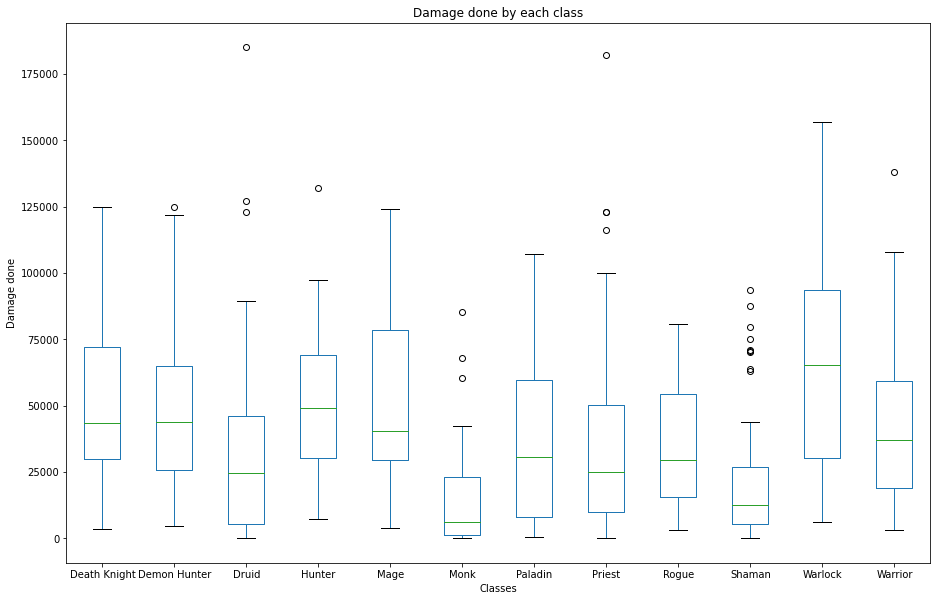

In [14]:
plt.figure()
dfwg.boxplot(column='DD', by='Class', grid=False)
plt.xlabel('Classes')
plt.ylabel('Damage done')
plt.suptitle("")
plt.title("Damage done by each class")
plt.show()

Display of the damage done by players from each class in Warsong Gulch

<Figure size 1080x720 with 0 Axes>

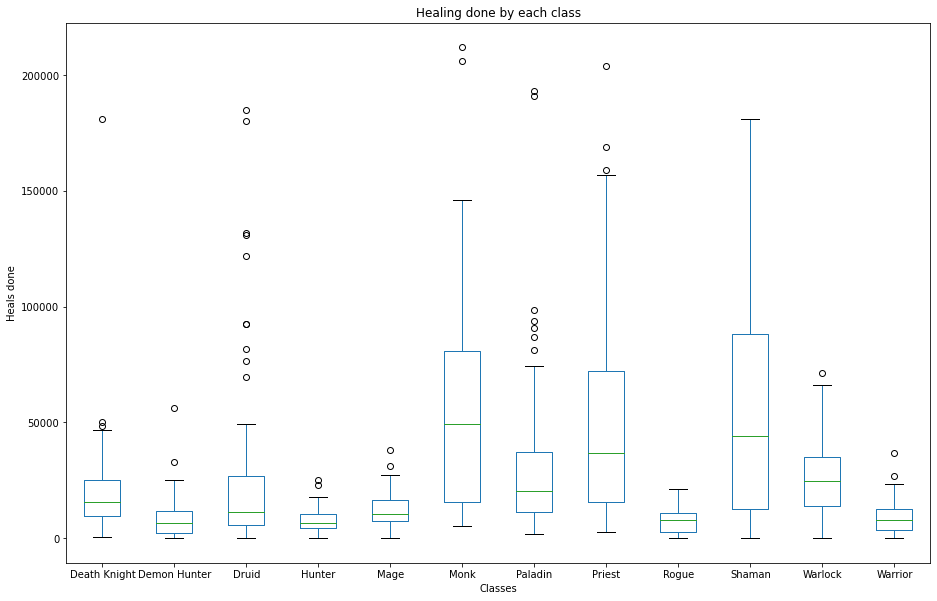

In [15]:
plt.figure()
dfwg.boxplot(column='HD', by='Class', grid=False)
plt.xlabel('Classes')
plt.ylabel('Heals done')
plt.suptitle("")
plt.title("Healing done by each class")
plt.show()

Display of healing done by players from each Class in Warsong Gulch

<Figure size 1080x720 with 0 Axes>

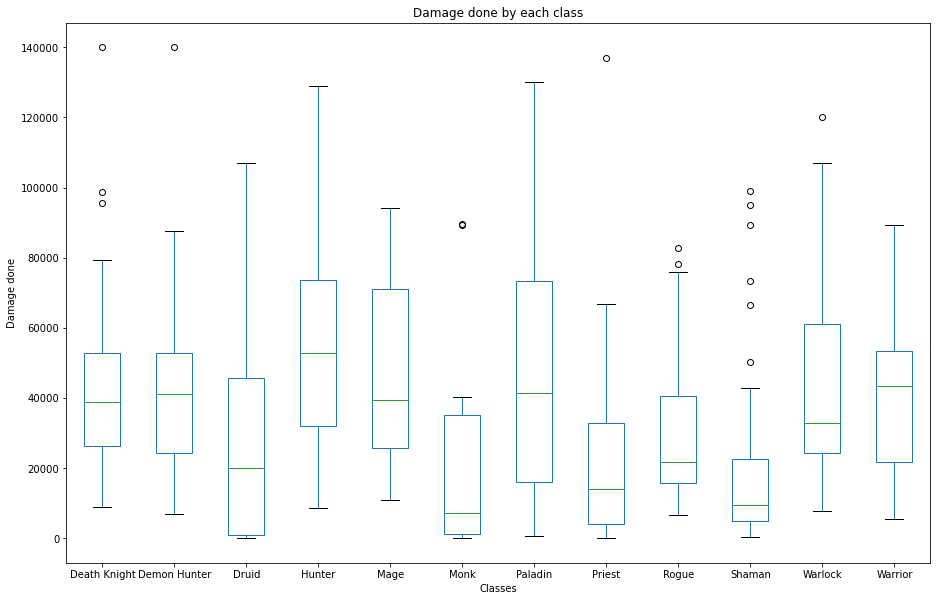

In [16]:
plt.figure()
dftk.boxplot(column='DD', by='Class', grid=False)
plt.xlabel('Classes')
plt.ylabel('Damage done')
plt.suptitle("")
plt.title("Damage done by each class")
plt.show()

Damange done by classes in Temple of Kotmogu

<Figure size 1080x720 with 0 Axes>

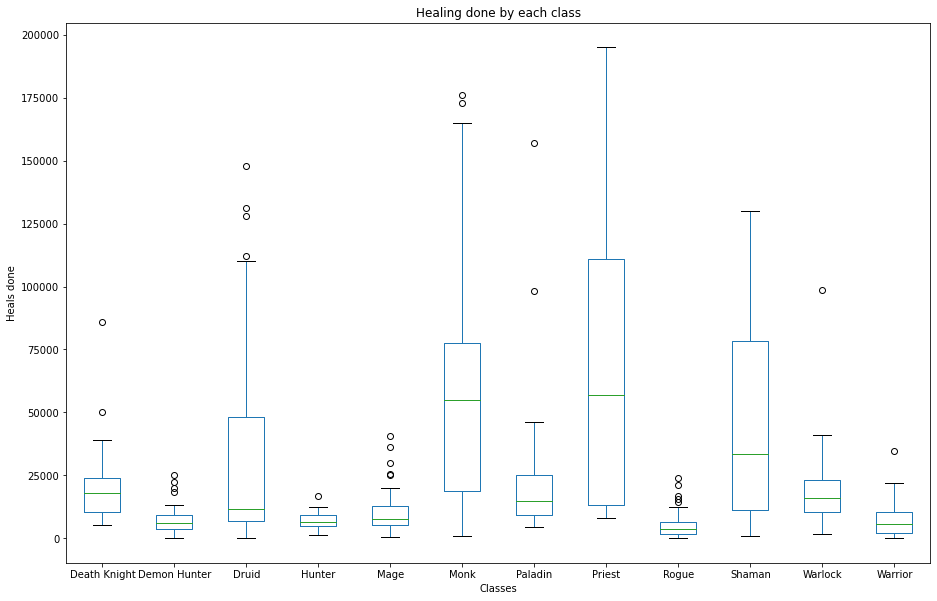

In [17]:
plt.figure()
dftk.boxplot(column='HD', by='Class', grid=False)
plt.xlabel('Classes')
plt.ylabel('Heals done')
plt.suptitle("")
plt.title("Healing done by each class")
plt.show()

Healing done by classes in Temple of Kotmogu

<Figure size 1080x720 with 0 Axes>

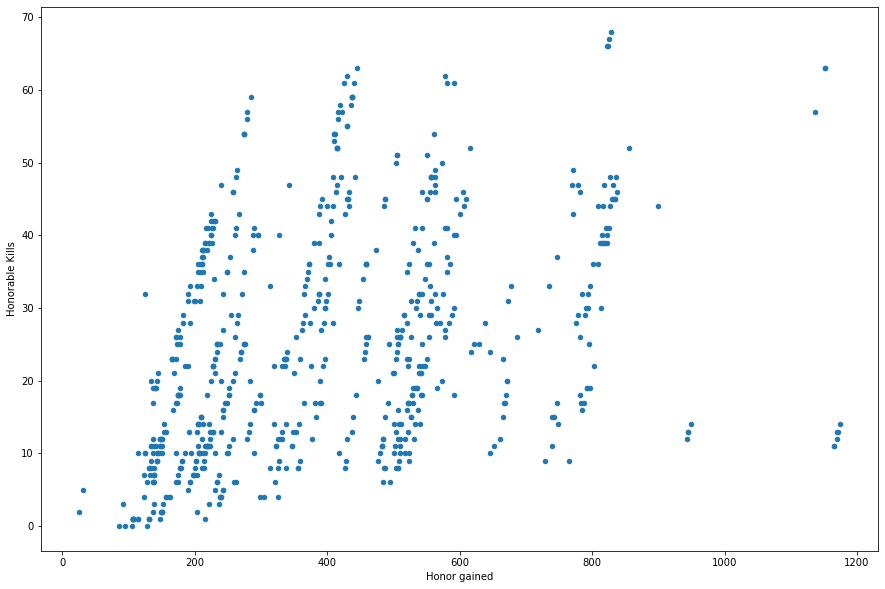

In [18]:
plt.figure()
dfwg.plot.scatter('Honor', 'HK')
plt.xlabel('Honor gained')
plt.ylabel('Honorable Kills')
plt.show()   

Displaying the honor gain based on honorable kills in Warsong Gulch. However, it shows that the high kills don't really connect into high honor gain.

<Figure size 1080x720 with 0 Axes>

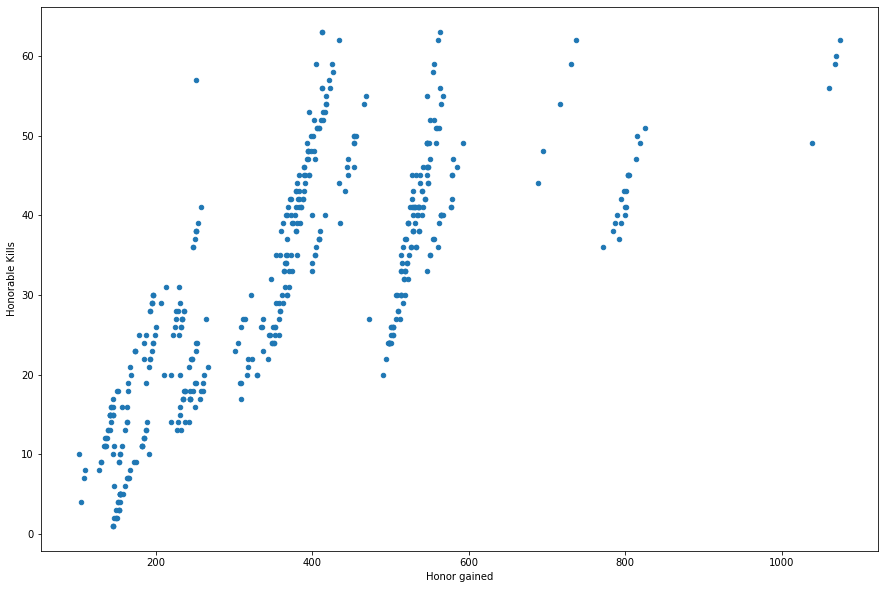

In [19]:
plt.figure()
dftk.plot.scatter('Honor', 'HK')
plt.xlabel('Honor gained')
plt.ylabel('Honorable Kills')
plt.show()   

Honor gained based on honorable kills on Temple of Kotmogu. This also demonstrates that high honorable kills do not offer high honor.

# Linear Regression for TK

In [81]:
xTK = dftk.drop(['Code', 'Faction', 'Rol', 'BE', 'Win', 'Lose', 'Class' , 'OP'], axis = 1)  
print(xTK.head())
yTK = dftk['Honor']
print(yTK)

   KB  D  HK     DD     HD   VP  Honor
0   6  3  58  25925  11314  444    554
1   6  2  57  28438   5258  120    251
2   8  3  55  45584   7932   80    547
3   0  0  59   7664  54796    0    405
4   2  6  12  32693   7929   20    185
0      554
1      251
2      547
3      405
4      185
      ... 
489    346
490    330
491    358
492    330
493    354
Name: Honor, Length: 494, dtype: int64


In [84]:
xTK_train = xTK[0:400]
xTK_test = xTK[400:]

yTK_train = yTK[0:400]
yTK_test = yTK[400:]

In [91]:
lm = linear_model.LinearRegression()
lm.fit(xTK_train, yTK_train)

LinearRegression()

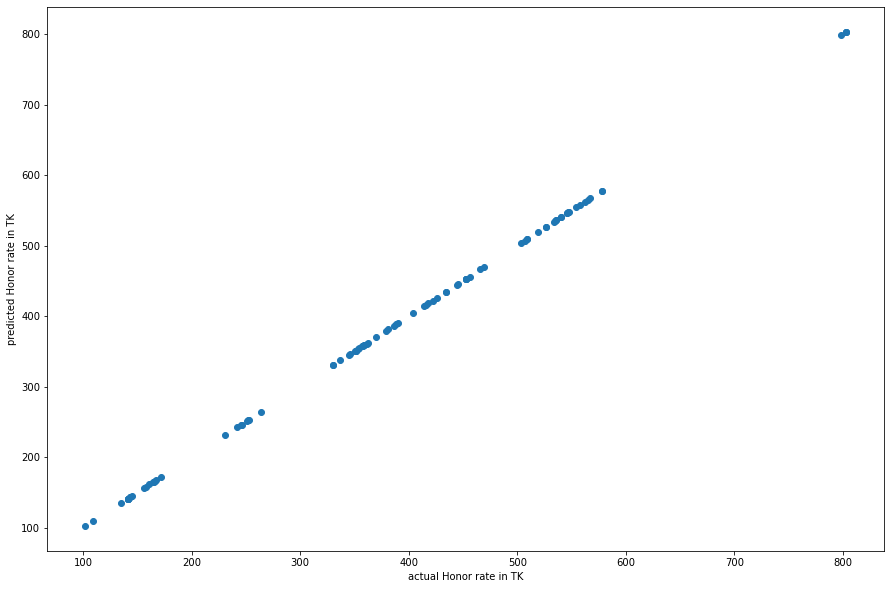

In [92]:
preds2 = lm.predict(xTK_test)

plt.figure()
plt.scatter(yTK_test, preds2)
plt.xlabel('actual Honor rate in TK')
plt.ylabel('predicted Honor rate in TK')
plt.show()

Honor gain rate and prediction rate has no error between since we did not have any missing values. However, the diagram shows the consistency.

# Linear Regression for Walsong Gulch(WG)

In [93]:
xWG = dfwg.drop(['Code', 'Class','Faction', 'Rol', 'BE', 'Win', 'Lose', 'FR', 'FC', 'Honor'], axis = 1)  
print(xWG.head())
yWG = dfwg['Honor']
print(yWG)

   KB  D  HK     DD     HD
0   1  3  14  48155   6641
1   1  3  12  27025   7106
2   0  1  19    824  93879
3   1  2  25   7046  98599
4   2  3  23  65483  19629
0      532
1      377
2      252
3      274
4      268
      ... 
682    615
683    555
684    193
685    581
686    808
Name: Honor, Length: 687, dtype: int64


In [94]:
xWG_train = xWG[0:400]
xWG_test = xWG[400:]

yWG_train = yWG[0:400]
yWG_test = yWG[400:]

In [96]:
lm.fit(xWG_train, yWG_train)

LinearRegression()

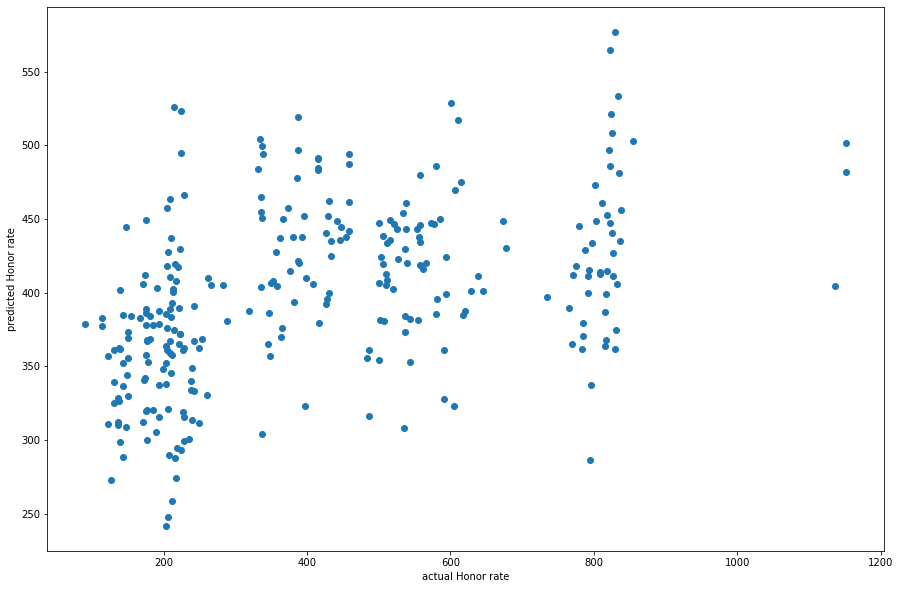

In [97]:
preds1 = lm.predict(xWG_test)

plt.figure()
plt.scatter(yWG_test, preds1)
plt.xlabel('actual Honor rate')
plt.ylabel('predicted Honor rate')
plt.show()

# Priest heal vs Shaman heal in TK

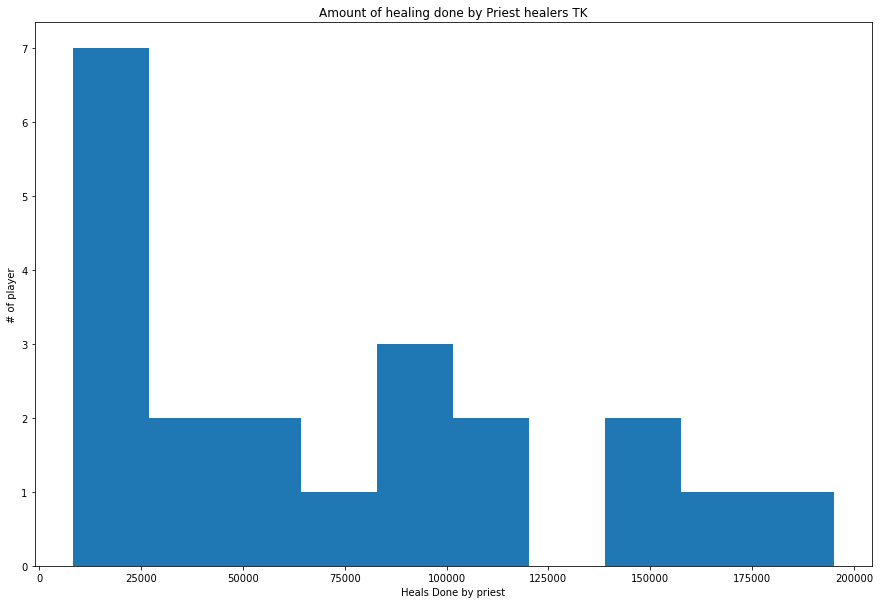

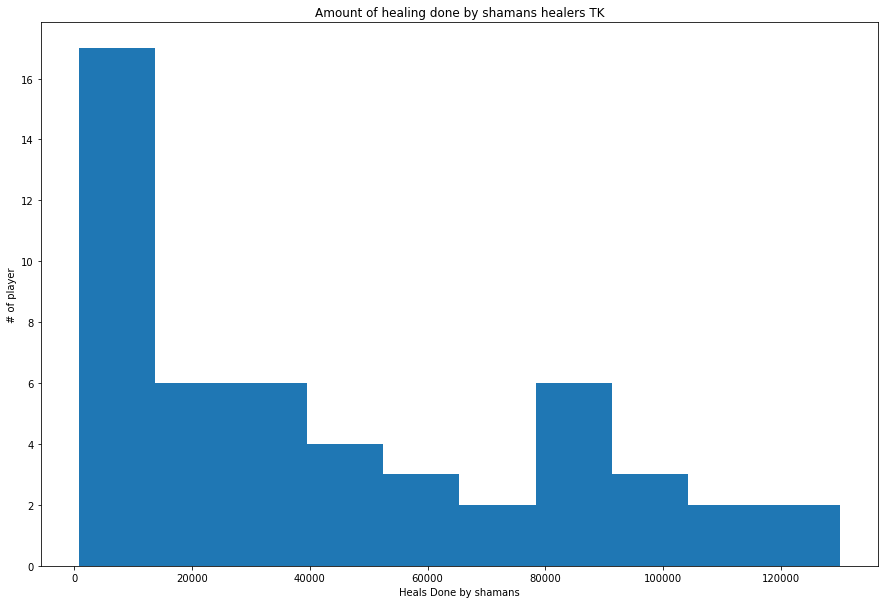

In [100]:
dftk_priest = dftk[dftk['Class'] == 'Priest']
dftk_shaman = dftk[dftk['Class'] == 'Shaman']

plt.figure()
dftk_priest['HD'].plot.hist()
plt.xlabel('Heals Done by priest')
plt.ylabel('# of player')
plt.title('Amount of healing done by Priest healers TK')
plt.show()

plt.figure()
dftk_shaman['HD'].plot.hist()
plt.xlabel('Heals Done by shamans')
plt.ylabel('# of player')
plt.title('Amount of healing done by shamans healers TK')
plt.show()


As you can see that, number of shaman players are little more higher than priest players. Moreover, it has concluded that there are priests that heal more than shamans.

# Priest heal vs Shaman heal in WG

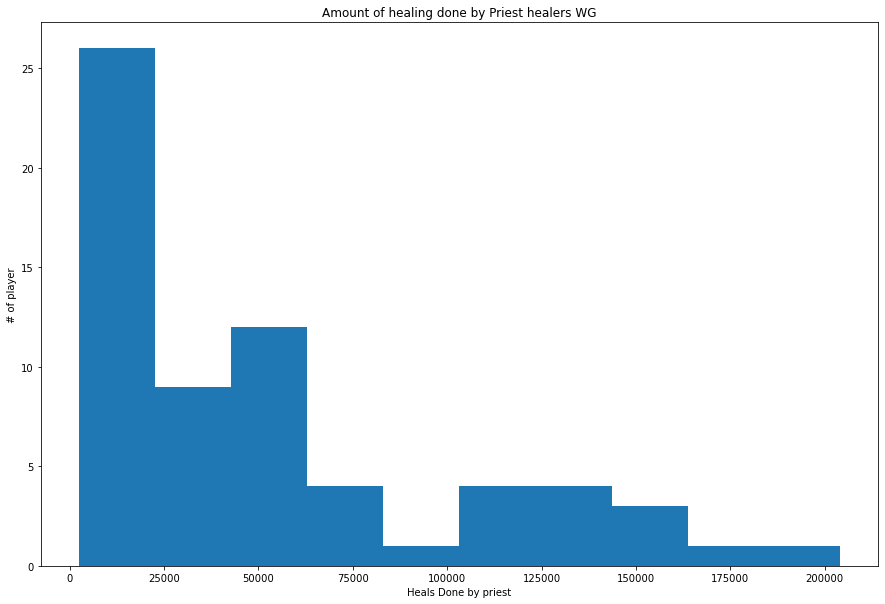

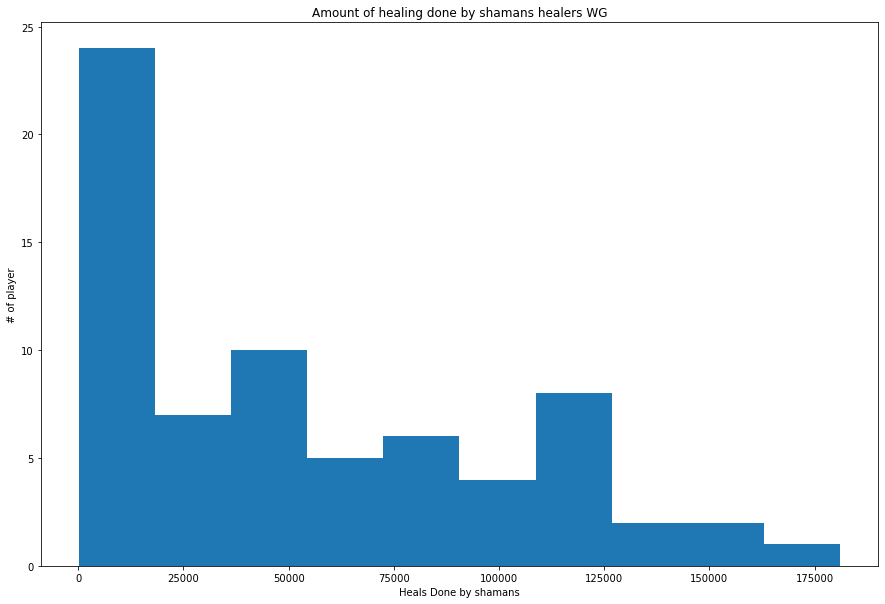

In [104]:
dfwg_priest = dfwg[dfwg['Class'] == 'Priest']
dfwg_shaman = dfwg[dfwg['Class'] == 'Shaman']

plt.figure()
dfwg_priest['HD'].plot.hist()
plt.xlabel('Heals Done by priest')
plt.ylabel('# of player')
plt.title('Amount of healing done by Priest healers WG')
plt.show()

plt.figure()
dfwg_shaman['HD'].plot.hist()
plt.xlabel('Heals Done by shamans')
plt.ylabel('# of player')
plt.title('Amount of healing done by shamans healers WG')
plt.show()

# Warrior DPS vs Hunter DPS in TK

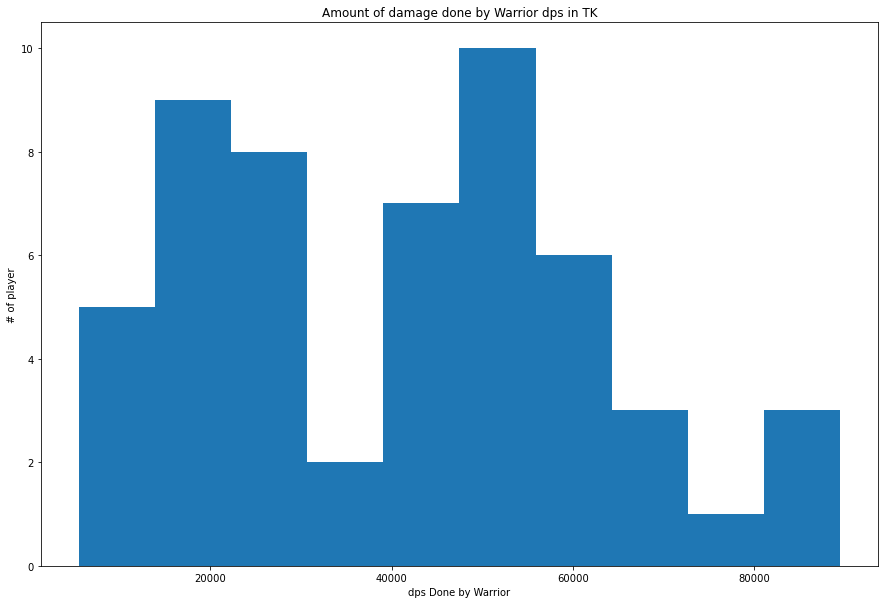

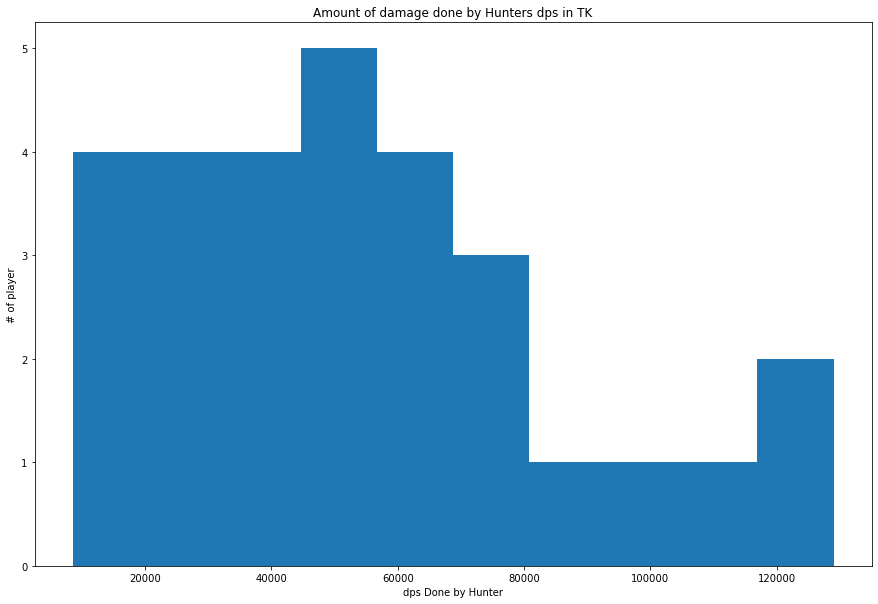

In [101]:
dftk_Warrior = dftk[dftk['Class'] == 'Warrior']
dftk_Hunter = dftk[dftk['Class'] == 'Hunter']

plt.figure()
dftk_Warrior['DD'].plot.hist()
plt.xlabel('dps Done by Warrior')
plt.ylabel('# of player')
plt.title('Amount of damage done by Warrior dps in TK')
plt.show()

plt.figure()
dftk_Hunter['DD'].plot.hist()
plt.xlabel('dps Done by Hunter')
plt.ylabel('# of player')
plt.title('Amount of damage done by Hunters dps in TK')
plt.show()

# Warrior DPS vs Hunter DPS in WG

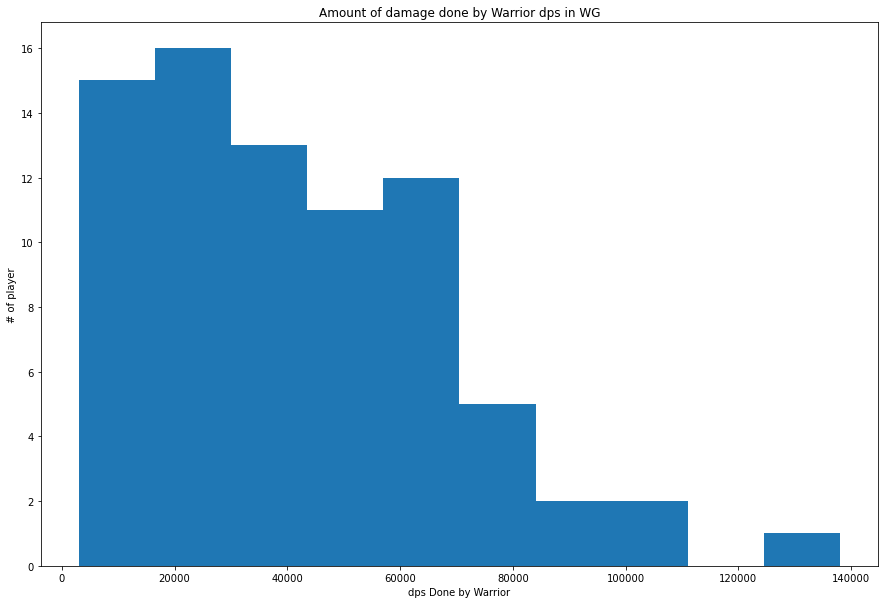

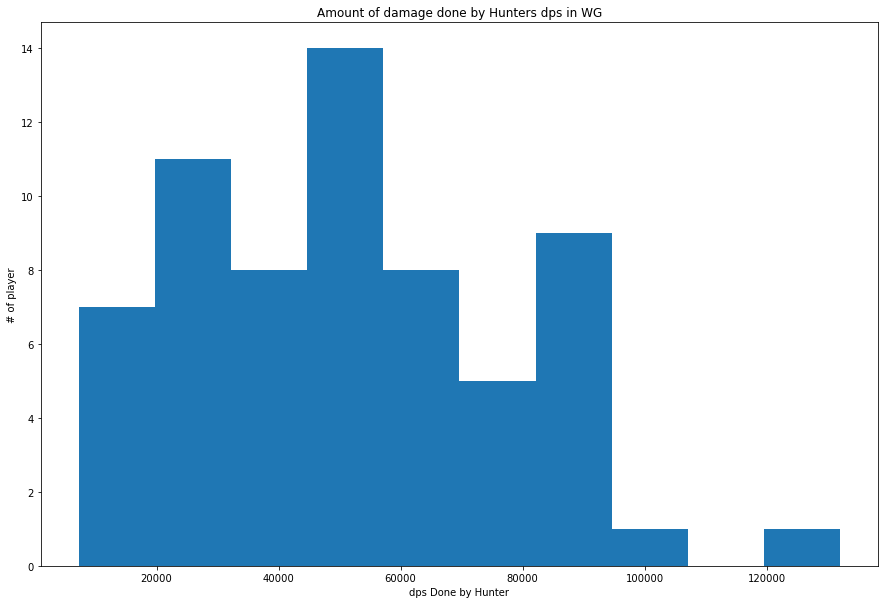

In [103]:
dfwg_Warrior = dfwg[dfwg['Class'] == 'Warrior']
dfwg_Hunter = dfwg[dfwg['Class'] == 'Hunter']

plt.figure()
dfwg_Warrior['DD'].plot.hist()
plt.xlabel('dps Done by Warrior')
plt.ylabel('# of player')
plt.title('Amount of damage done by Warrior dps in WG')
plt.show()

plt.figure()
dfwg_Hunter['DD'].plot.hist()
plt.xlabel('dps Done by Hunter')
plt.ylabel('# of player')
plt.title('Amount of damage done by Hunters dps in WG')
plt.show()

Digram has shown that Warriors have possiblity to output 140k damange while hunters can do maximum of 120k damange per match. However, Hunters tend to have more stable damange compare to warriors since they highly rely on the gears that they have. 